In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv('/content/crime_data.csv')

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
crime = crime.iloc[:,1:]

In [11]:
norm=MinMaxScaler()

In [13]:
norm.fit(crime)

MinMaxScaler()

In [14]:
norm_crime = norm.transform(crime)

In [15]:
type(norm_crime)

numpy.ndarray

In [16]:
from sklearn.cluster import KMeans

In [17]:
from scipy.spatial.distance import cdist

In [18]:
k_mean = list(range(2,15))

In [19]:
k_mean
TWSS = []
for i in k_mean:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_crime)
    WSS = []
    for j in range(i):
       j
       WSS.append(sum(cdist(norm_crime[kmeans.labels_==j,:],
        kmeans.cluster_centers_[j].reshape(1,norm_crime.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

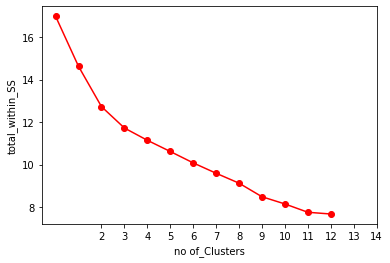

In [20]:
plt.plot(TWSS, 'ro-')
plt.xlabel("no of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k_mean)
plt.show()

In [21]:
model = KMeans(n_clusters = 4)
model.fit(norm_crime)

KMeans(n_clusters=4)

In [22]:
model.labels_
series_array=pd.Series(model.labels_)
crime["clust"]=series_array

cluster1= crime.iloc[:,1:4].groupby(crime.clust).mean()

In [23]:
cluster1

,Assault,UrbanPop,Rape
clust,,,
0,78.538462,52.076923,12.176923
1,264.000000,76.500000,33.608333
2,141.176471,73.647059,19.335294
3,243.625000,53.750000,21.412500
